# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.7.0


### Creating data to view or fit

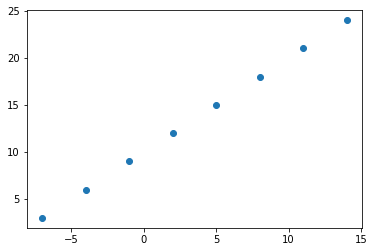

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (usually uppercase X)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (usually lowercase y)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visaulise it
plt.scatter(X,y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes (dependent & independent)

In [4]:
# Create demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700]
                          )
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [6]:
# Take note that this would be seen as a scalar due to 0-dimensions
X[0].ndim

0

In [7]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

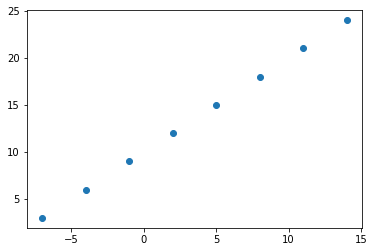

In [9]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. ***Creating a model*** - define the input and output layers as well as the hidden layers of a deep learning model.
2. ***Compiling a model*** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performence of our model)
3. ***Fitting a model*** - letting the model trying to find patterns between X and y (features & labels)

### Key terms
* ***sequencial API*** => groups a linear stack of layers into a tf.keras.Model, also provides training and inference (conclusion reached) features on this model
* ***tf.keras.losses.mae*** => Computes the mean absolute error between labels and predictions (how average are our predictions)
* ***mae*** => is short for mean (Avg) absolute (Positive value) error
* ***SGD*** => is short for stochastic gradient descent => It is an iterative method for optimizing an objective function with suitable smoothness properties


In [10]:
# Setting a random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model using the 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 547ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [13]:
# Looking at training output, we can see that we are 11 points off on average
y_pred + 11 

array([[23.71602]], dtype=float32)

## Improving our model for accuracy

To improve our model, we alter almost every part of the 3 steps we went through before.

1. ***Creating a model*** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. ***Compiling a model*** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. ***Fitting a model*** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

>**THE LEARNING RATE IS POTENTIALLY THE MOST IMPORTANT HYPERPARAMETER YOU CAN CHANGE ON ALL OF YOUR NEURAL NETWORKS**

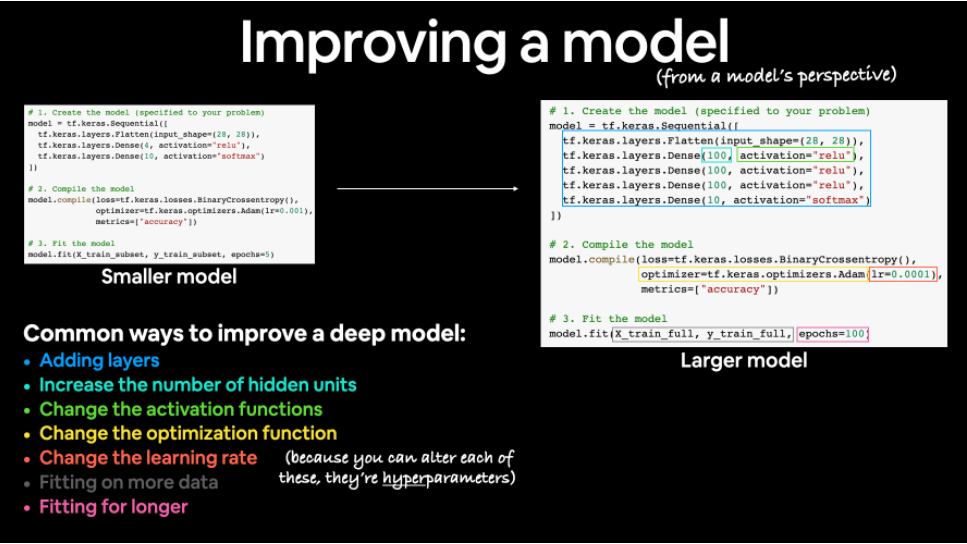

There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as hyperparameters) and the practice of trying to find the best hyperparameters is referred to as hyperparameter tuning.

In [14]:
# Rebuilding our model to improve accuracy by increasing the cycles (epochs => reference to step 3)
tf.random.set_seed(42)

# 1. Create a model using the 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 223ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 6m

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Checking if our model prediction has improved
model.predict([17.0]) # Closer to hitting 27!

array([[30.158512]], dtype=float32)

In [17]:
# Improving the model => Important: Make small changes rather large changes to the model
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# Create the compiler
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

# Fit the model (expand dimension due to TensorFlow 2.7.0 +)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 314ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.5071 - mae: 12.5071
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.8279 - mae: 11.8279
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1425 - mae: 11.1425
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4485 - mae: 10.4485
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 9.7427 - mae: 9.7427
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0218 - mae: 9.0218
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2826 - mae: 8.2826
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5221 - mae: 7.5221
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.7841 - mae: 6.7841
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - 

In [18]:
# Remind ourselves by the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's try a predcition => Previous prediction was 31.4

#Changes
# Decrease the hidden Units, changed activation function to None
# Changed Optimization function to Adam() and increased our learning rate to 0.01

# Take NOTE:
# Our model is over fitting, due to learning the training data to well (learning the patterns betweens X & y far to well)
# when it sees a new X it's just relating back to what it knows already, and the MAE produced during training isn't really
# a valid reprenstation on what it's actually doing.


model.predict([17.0])

array([[27.216782]], dtype=float32)

## Evaluating a models performence
A typical workflow going through when building neural networks is:
>Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

*When it comes to evaluation... there are 3 words you should memorize:*

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* **The data** - what data are we working with? what does it look like?
* **The model itself** - what does our model look like?
* **The training of the model** - how does a model perform while it learns?
* **The predictions of the model** - how do the predictions of a model line up against the ground truth (the original labels)?

In [20]:
# Making a bigger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# Make labels for the data set 

# formula of our pattern to learn 
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

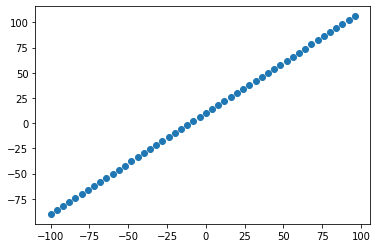

In [22]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have avialable
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

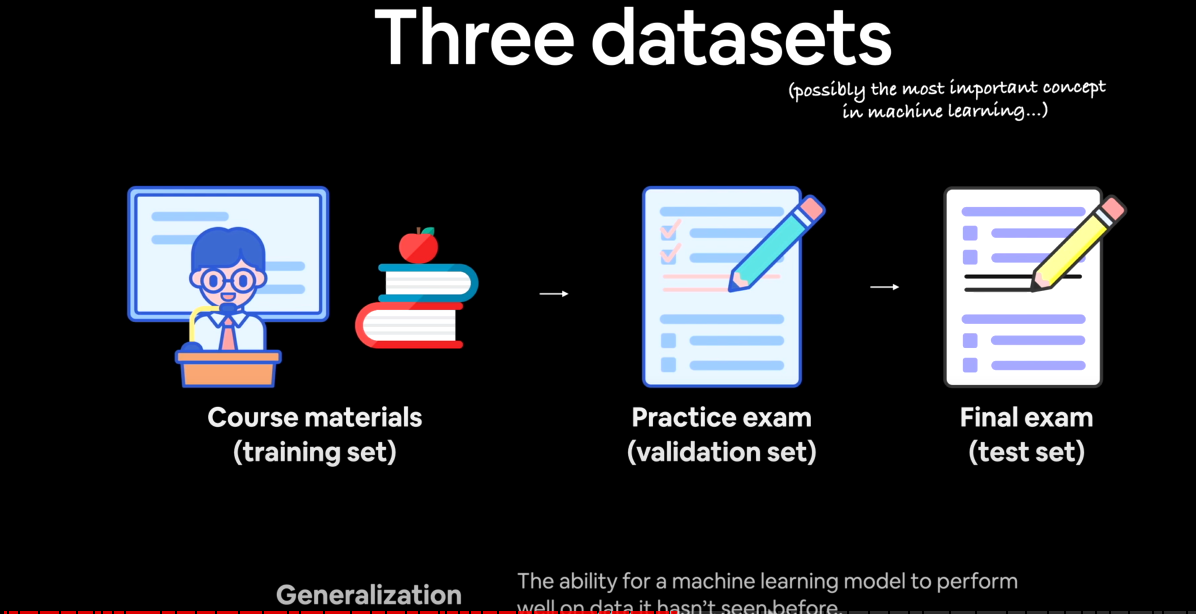

In [23]:
# Check the length of how many samples we have
len(X)

50

In [24]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets, let's visualize it again.

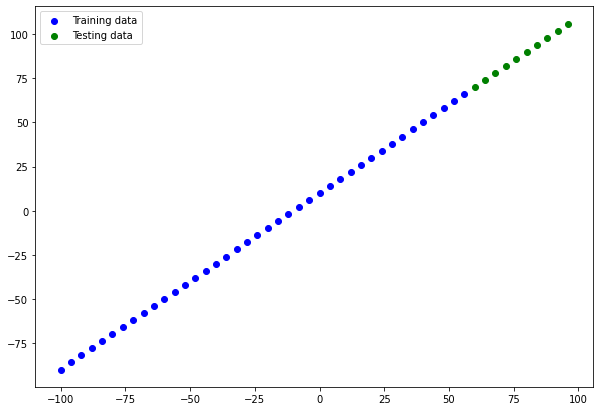

In [25]:
# Plotting two samples of data

# setting the size of the diagram
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend()

In [26]:
# Let's check how we can build a Neural Network for our data

# Set seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model (TensorFlow 2.0+ is needed with one dimension atleast)
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

# Visualizing the model

In [27]:
model.summary() # Meant to error :)

ValueError: ignored

In [28]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [29]:
# Let-s create a model which builds automatically by defining the input_shape argument in the first layer

# Set seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model_1")

# Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model (TensorFlow 2.0+ is needed with one dimension atleast)
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [30]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

> 📖**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video.](https://youtu.be/njKP3FqW3Sk)

> 🧰 **Exercise:** Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

In [31]:
# Let's fit our model to training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # Verbose 0 meaning there will be no output CTRL + SHIFT

In [32]:
# Get a summary of our model
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


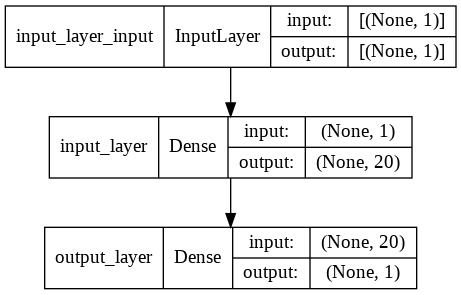

In [33]:
# Another way on visualizing our model
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our models predictions

To visualize predictions, it's a good ideas to plot them against the ground truth labels (y_test).

* Ground Truth Data: refers to the actual nature of the problem that is the target of a machine learning model, reflected by the relevant data sets associated with the use case in question. (To simplify it, use case towards data sets that are being tested against and for this section we are doing tests agaist our y_labels with our X_data, so y_labels would be seen as the ground truth) 

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [34]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.35298 ],
       [ 74.92796 ],
       [ 79.50294 ],
       [ 84.07793 ],
       [ 88.652885],
       [ 93.22786 ],
       [ 97.802826],
       [102.377815],
       [106.9528  ],
       [111.52776 ]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 Note: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to put it into a function.

In [36]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  # Setting diagram size
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot models prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend()


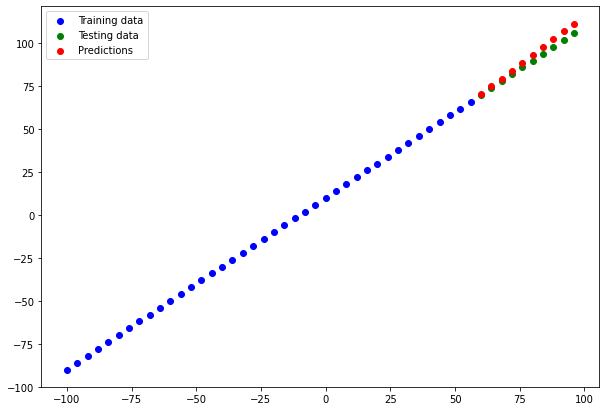

In [37]:
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's perfomance.

Since we're working on a regression, two of the main metrics are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions, "square the average errors" (use if larger errors are more detrimental than smaller errors).

In [38]:
# Evaluate the model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 109ms/step - loss: 2.9404 - mae: 2.9404


[2.9403769969940186, 2.9403769969940186]

In [39]:
# Calculate the mean absolute error
#tf.keras.losses.MAE()
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.717615, 14.243222, 11.798825, 10.384415, 10.      , 10.645572,
       12.321131, 15.102252, 18.952797, 23.527763], dtype=float32)>

In [40]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.35298 ],
       [ 74.92796 ],
       [ 79.50294 ],
       [ 84.07793 ],
       [ 88.652885],
       [ 93.22786 ],
       [ 97.802826],
       [102.377815],
       [106.9528  ],
       [111.52776 ]], dtype=float32)>

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.35298 ,  74.92796 ,  79.50294 ,  84.07793 ,  88.652885,
        93.22786 ,  97.802826, 102.377815, 106.9528  , 111.52776 ],
      dtype=float32)>

In [43]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=2.9403756>

In [44]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.373231>

In [45]:
# Let's create helper functions to reuse MAE & MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))


def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))



### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> and so on
```

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

To do so, we'll build 3 models and compare their results:
1. ```model_1``` - same as original model, 1 layer, trained for 100 epochs.
2. ```model_2``` - 2 layers, trained for 100 epochs.
3. ```model_3``` - 2 layers, trained for 500 epochs.

In [46]:
# Build model_1

# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

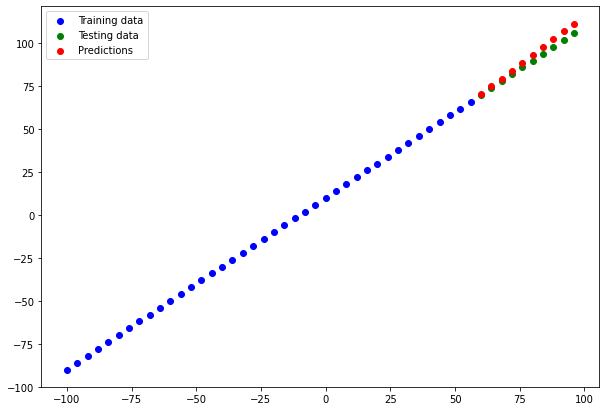

In [47]:
# Make and plot predictions for model_1

# The test data, because remember our model has never seen the test data, but trained on the "train_data 80%"
y_pred_1 = model.predict(X_test)

plot_predictions(predictions=y_pred_1)

In [48]:
# Calculate model_1 evaluation metrics

mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

print('MAE: ', mae_1.numpy(), '\n')
print('MSE: ', mse_1.numpy())

MAE:  2.9403756 

MSE:  11.373231


In [49]:
# Build model_2

# set seed
tf.random.set_seed(42)

# build model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

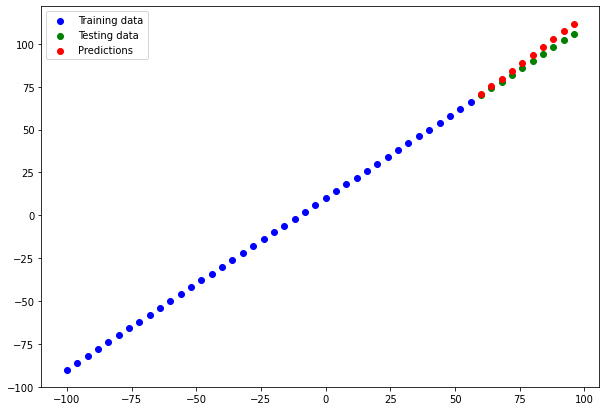

In [52]:
# Plot the predictions of model_2

y_pred_2 = model_2.predict(X_test)

plot_predictions(predictions=y_pred_2)

In [51]:
# Check Model 2 Evaluation Metrics
mse_2 = mse(y_test, y_pred_2)
mae_2 = mae(y_test, y_pred_2)


print('MAE: ', mae_2.numpy(), '\n')
print('MSE: ', mse_2.numpy())

MAE:  3.1969407 

MSE:  13.070143


In [53]:
# Build Model_3

# set seed
tf.random.set_seed(42)

# Build model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1)
])

# Compile model
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

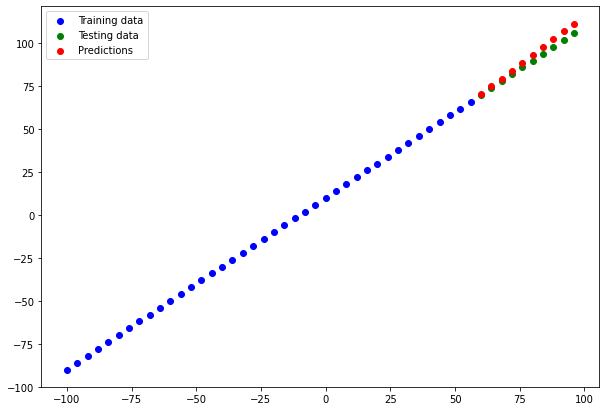

In [54]:
# Plot the predictions
y_pred_3 = model.predict(X_test)

plot_predictions(predictions=y_pred_3)

In [55]:
# Evaulate predictions
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)


print('MAE: ', mae_3.numpy(), '\n')
print('MSE: ', mse_3.numpy())

MAE:  2.9403756 

MSE:  11.373231


🔑 **Note**: You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

In [56]:
# Let's compare our model results using a pandas DataFrame (just a table)
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["MODEL", "MAE", "MSE"])

all_results

,MODEL,MAE,MSE
0,model_1,2.940376,11.373231
1,model_2,3.196941,13.070143
2,model_3,2.940376,11.373231


Looks like model_1 & model_2 had performed the best

In [57]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑 **Note**: One of our main goals should be to minimize the time between experiments. The more experiments you do, the more things you'll figure out which don't work in turn, get closer to figuring out what does work. Remember the machine learning practinior's motto: "experiment, experiment, experiment".

### Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tidious if you're running lots of experiments.

Luckily there are tools that help us with this!

📖 Resource: As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll try this later)
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our Models

You can save a TensorFlow/Keras model using ```model.save()```.


There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format)


The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [58]:
# Save model using the SavedModelFormat
model_2.save("neural_network_regression")

INFO:tensorflow:Assets written to: neural_network_regression/assets


In [59]:
# Save model using the HDF5 Format
model_2.save("neural_network_regression_HDF5.h5")

## Loading Saved Models

In [60]:
# Loading model (SavedModelFormat)
loaded_SavedModel_format = tf.keras.models.load_model("neural_network_regression")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compare Model 2 predictions with SavedModelFormat model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [63]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [64]:
# Loading model (HDF5) format
loaded_h5_model = tf.keras.models.load_model("neural_network_regression_HDF5.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compare Model 2 predictions with HDF5 model predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [66]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_h5_model_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## Download a model (or any other file) from Google Colab?

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

* Right click on the file in the files pane and click 'download'.
* Use the code below.

```
from google.colab import files
files.download("neural_network_regression_HDF5.h5")

```

In [ ]:
from google.colab import files
files.download("neural_network_regression")

## A Larger example

We're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, ```age```, ```sex```, ```bmi``, ```children```, ```smoking_status``` and ```residential_region```.

To do, we'll leverage the pubically available [Medical Cost Dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on Github](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)

🔑 **Note**: When learning machine learning paradigms (a pattern or model), you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [91]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [85]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/MarlboroJamez/machine-learning/main/tensorflow-DL-or-ML/datasets/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the ```get_dummies()``` method in pandas.

It converts categorical variables (like the ```sex```, ```smoker``` and ```region``` columns) into numerical variables using **one-hot** encoding.

In [81]:
# Let's try and one-hot encode our dataframe so that it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Now we'll split data into features (X) and labels (y).

In [87]:
# Create x and y values features and labels
X = insurance_one_hot.drop("charges", axis=1) # We don't need charges included to our features/predictions (independent variables)
Y = insurance_one_hot["charges"] # Dependent variables

In [88]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [89]:
# View Y
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [158]:
# Create Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # By default setting the data to tensors
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [161]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [156]:
# Building the model

# setting the seed
tf.random.set_seed(42)

# Creating the model
insurance_model = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

# compile the model
insurance_model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit the model
history = insurance_model.fit(X_train, y_train, epochs=200, verbose=0)

In [135]:
# insurance_model summary
insurance_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 50)                600       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 651
Trainable params: 651
Non-trainable params: 0
_________________________________________________________________


In [154]:
# Evaluate the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3186.3911 - mae: 3186.3911


[3186.39111328125, 3186.39111328125]

In [155]:
# If we take a look at our evaluation, we notice that on a average our model is off by 4615.4634,
# Where the average value of y_train is 13346.0897, that's considerable since the total amount is only 13346.0897.
# Our median shows 9575.4421 so if we're off by 4615.4634, we might be charging them with 5000+, where they should be charged with 9575.4421
                   
                   # Avg insurance cost
y_train.median() , y_train.mean()# The median value is the value in the middle => .median()

(9575.4421, 13346.089736364489)

Text(0.5, 0, 'epochs')

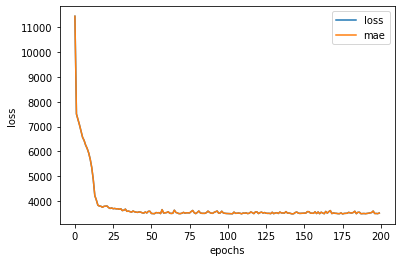

In [157]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

❓ **Question**: How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).


Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [Feature Scaling](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)
  * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
  * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
  * Which one should you use?
    * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.


> 📖 **Resource**: For more on preprocessing data, I'd recommend reading the following resources:
   * [Scikit-Learn's documentation on preprocessing data.](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data)
   * [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)


In [162]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


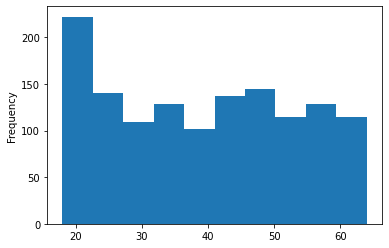

In [166]:
X["age"].plot(kind="hist") # scale 20 - 60

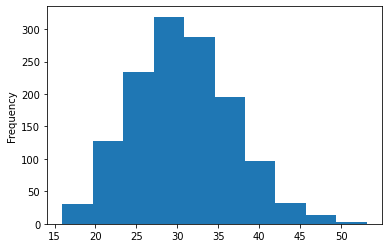

In [167]:
X["bmi"].plot(kind="hist") # scale 15 - 50

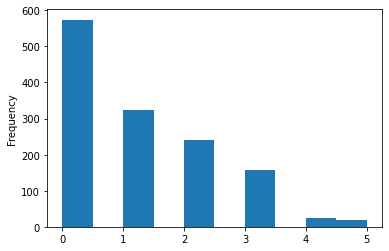

In [169]:
X["children"].plot(kind="hist") # scale 0 - 5

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Reading in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/MarlboroJamez/machine-learning/main/tensorflow-DL-or-ML/datasets/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* ```make_column_transformer``` - build a multi-step data preprocessing function for the folllowing trnasformations:
   * ```MinMaxScaler``` - make sure all numerical columns are normalized (between 0 and 1).
   * ```OneHotEncoder``` - one hot encode the non-numerical columns.


In [192]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd


# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)


# Create X and Y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]


# Build our trand and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalizeation (MinMaxScaler and OneHotEncoder)
X_train_normal = ct.transform(X_train) 
X_test_normal = ct.transform(X_test)

In [177]:
# What does our data look like now? (what it originally was)
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [182]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [183]:
# how has our shape changed?
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

## Beautiful! Data has been normalized and one hot encoded.

Now let's build a neural network model on it.

In [185]:
insurance_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               1200      
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [187]:
# Building the model

# setting the seed
tf.random.set_seed(42)

# Creating the model
insurance_model = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

# compile the model
insurance_model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit the model
history = insurance_model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13217.9932 - mae: 13217.9932
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 11378.8037 - mae: 11378.8037
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 8112.9468 - mae: 8112.9468
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 7588.9121 - mae: 7588.9121
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7103.4785 - mae: 7103.4785
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 6513.8735 - mae: 6513.8735
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 5593.9990 - mae: 5593.9990
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 4434.3403 - mae: 4434.3403
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 3745.8254 - mae: 3745.8254
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 3679.4282 - mae: 3679.

In [191]:
# Evaluate our insurance model on normalize data
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3162.5098 - mae: 3162.5098


[3162.509765625, 3162.509765625]

In [190]:
# Un-normalized data evaluation results
# 9/9 [==============================] - 0s 1ms/step - loss: 3186.3911 - mae: 3186.3911

Text(0.5, 0, 'epochs')

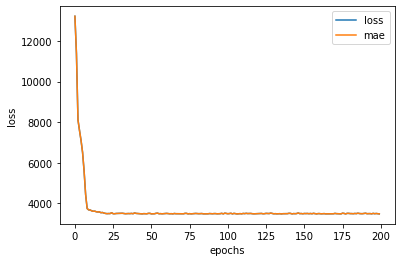

In [193]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

This is **one of the main benefits of normalization**: faster convergence time (a fancy way of saying, your model gets to better results faster).



# 📖 Extra curriculum

* [MIT introduction deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) - gives a great overview of what's happening behind all of the code we're running.
* Reading: 1-hour of [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.
* Practice your regression modelling with TensorFlow, also have a look at [Lion Bridge's collection of datasets](https://lionbridge.ai/datasets/) or [Kaggle's datasets](https://www.kaggle.com/data), find a regression dataset which sparks your interest and try to model. 
